In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read and check data

In [19]:
df = pd.read_csv('data.csv')
df.head(5)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3


In [20]:
df.isna().sum()

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

# See distribution of Purchases

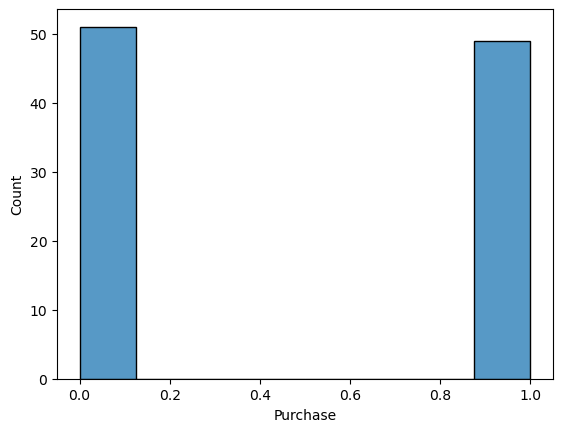

In [21]:
# histogram of System Usability Survery (SUS) score
sns.histplot(data=df['Purchase'], palette='bright')
plt.show()

# Prep and label data for model training

In [22]:
# label
y = df['Purchase'].to_numpy()
y

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [23]:
# data
X = df.drop('Purchase', axis = 1).to_numpy()
X

array([[ 84, 254,   0,   3,   2],
       [ 58, 247,   0,   6,   9],
       [ 56, 125,   1,   6,   8],
       [ 55,  22,   0,  11,   7],
       [ 95, 262,   0,   2,   3],
       [ 71, 113,   1,   8,   9],
       [ 76,  91,   1,   6,   3],
       [ 64,  46,   0,   6,  11],
       [ 56, 132,   0,   9,   9],
       [ 96, 190,   0,  11,   4],
       [ 56, 146,   0,   9,   7],
       [ 80, 226,   0,   4,   4],
       [ 72,  54,   1,   7,   9],
       [ 81, 104,   0,   2,   3],
       [ 72, 292,   0,   7,   3],
       [ 66, 126,   0,   8,   9],
       [ 89, 152,   1,   3,   5],
       [ 80, 221,   0,   3,   4],
       [ 66,  51,   0,   9,   9],
       [ 74, 230,   0,   6,   8],
       [ 74,  72,   1,   6,   8],
       [ 68, 284,   0,   6,  11],
       [ 96, 168,   0,   2,   4],
       [ 98, 194,   0,   1,   3],
       [ 86, 130,   1,  10,   1],
       [ 58, 227,   0,   9,   3],
       [ 75, 161,   1,   7,   8],
       [ 86, 262,   1,   2,   3],
       [ 65, 257,   1,   9,  11],
       [ 80,  

# Data Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

# Import Classifiers and Metrics from Sklearn

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

In [26]:
lc = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

# Train ML model with training dataset with model.fit() function

In [27]:
lc.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

# Test model with test dataset

In [28]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_knn_predicted = knn.predict(X_test)
y_knn_pred_proba = knn.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              preci

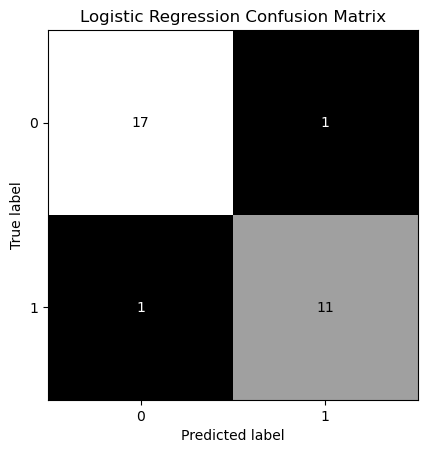

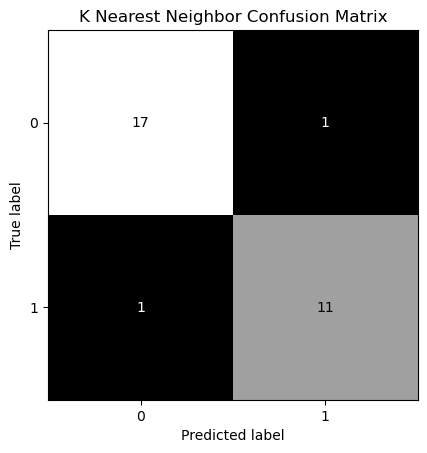

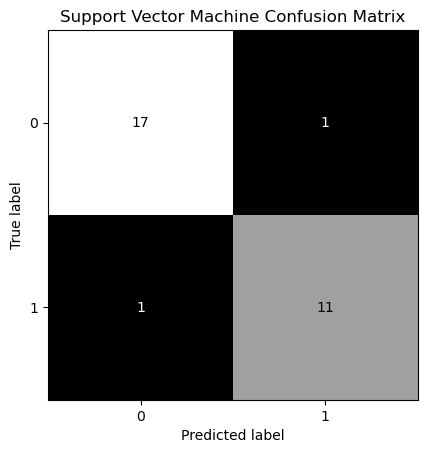

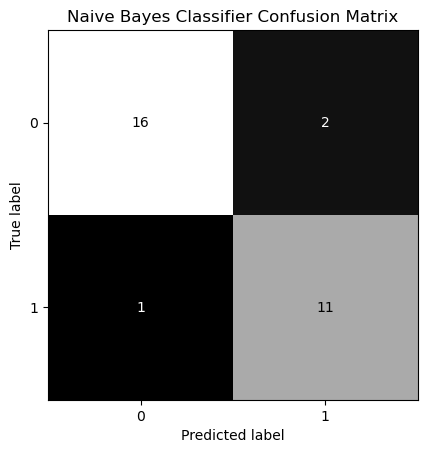

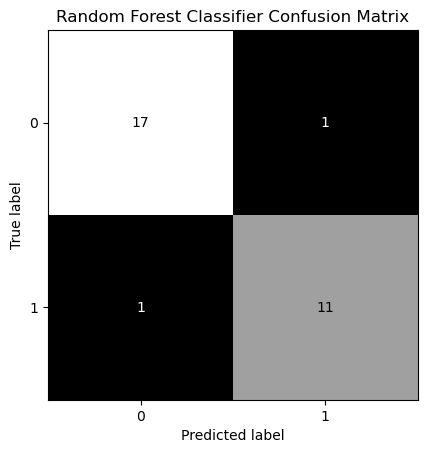

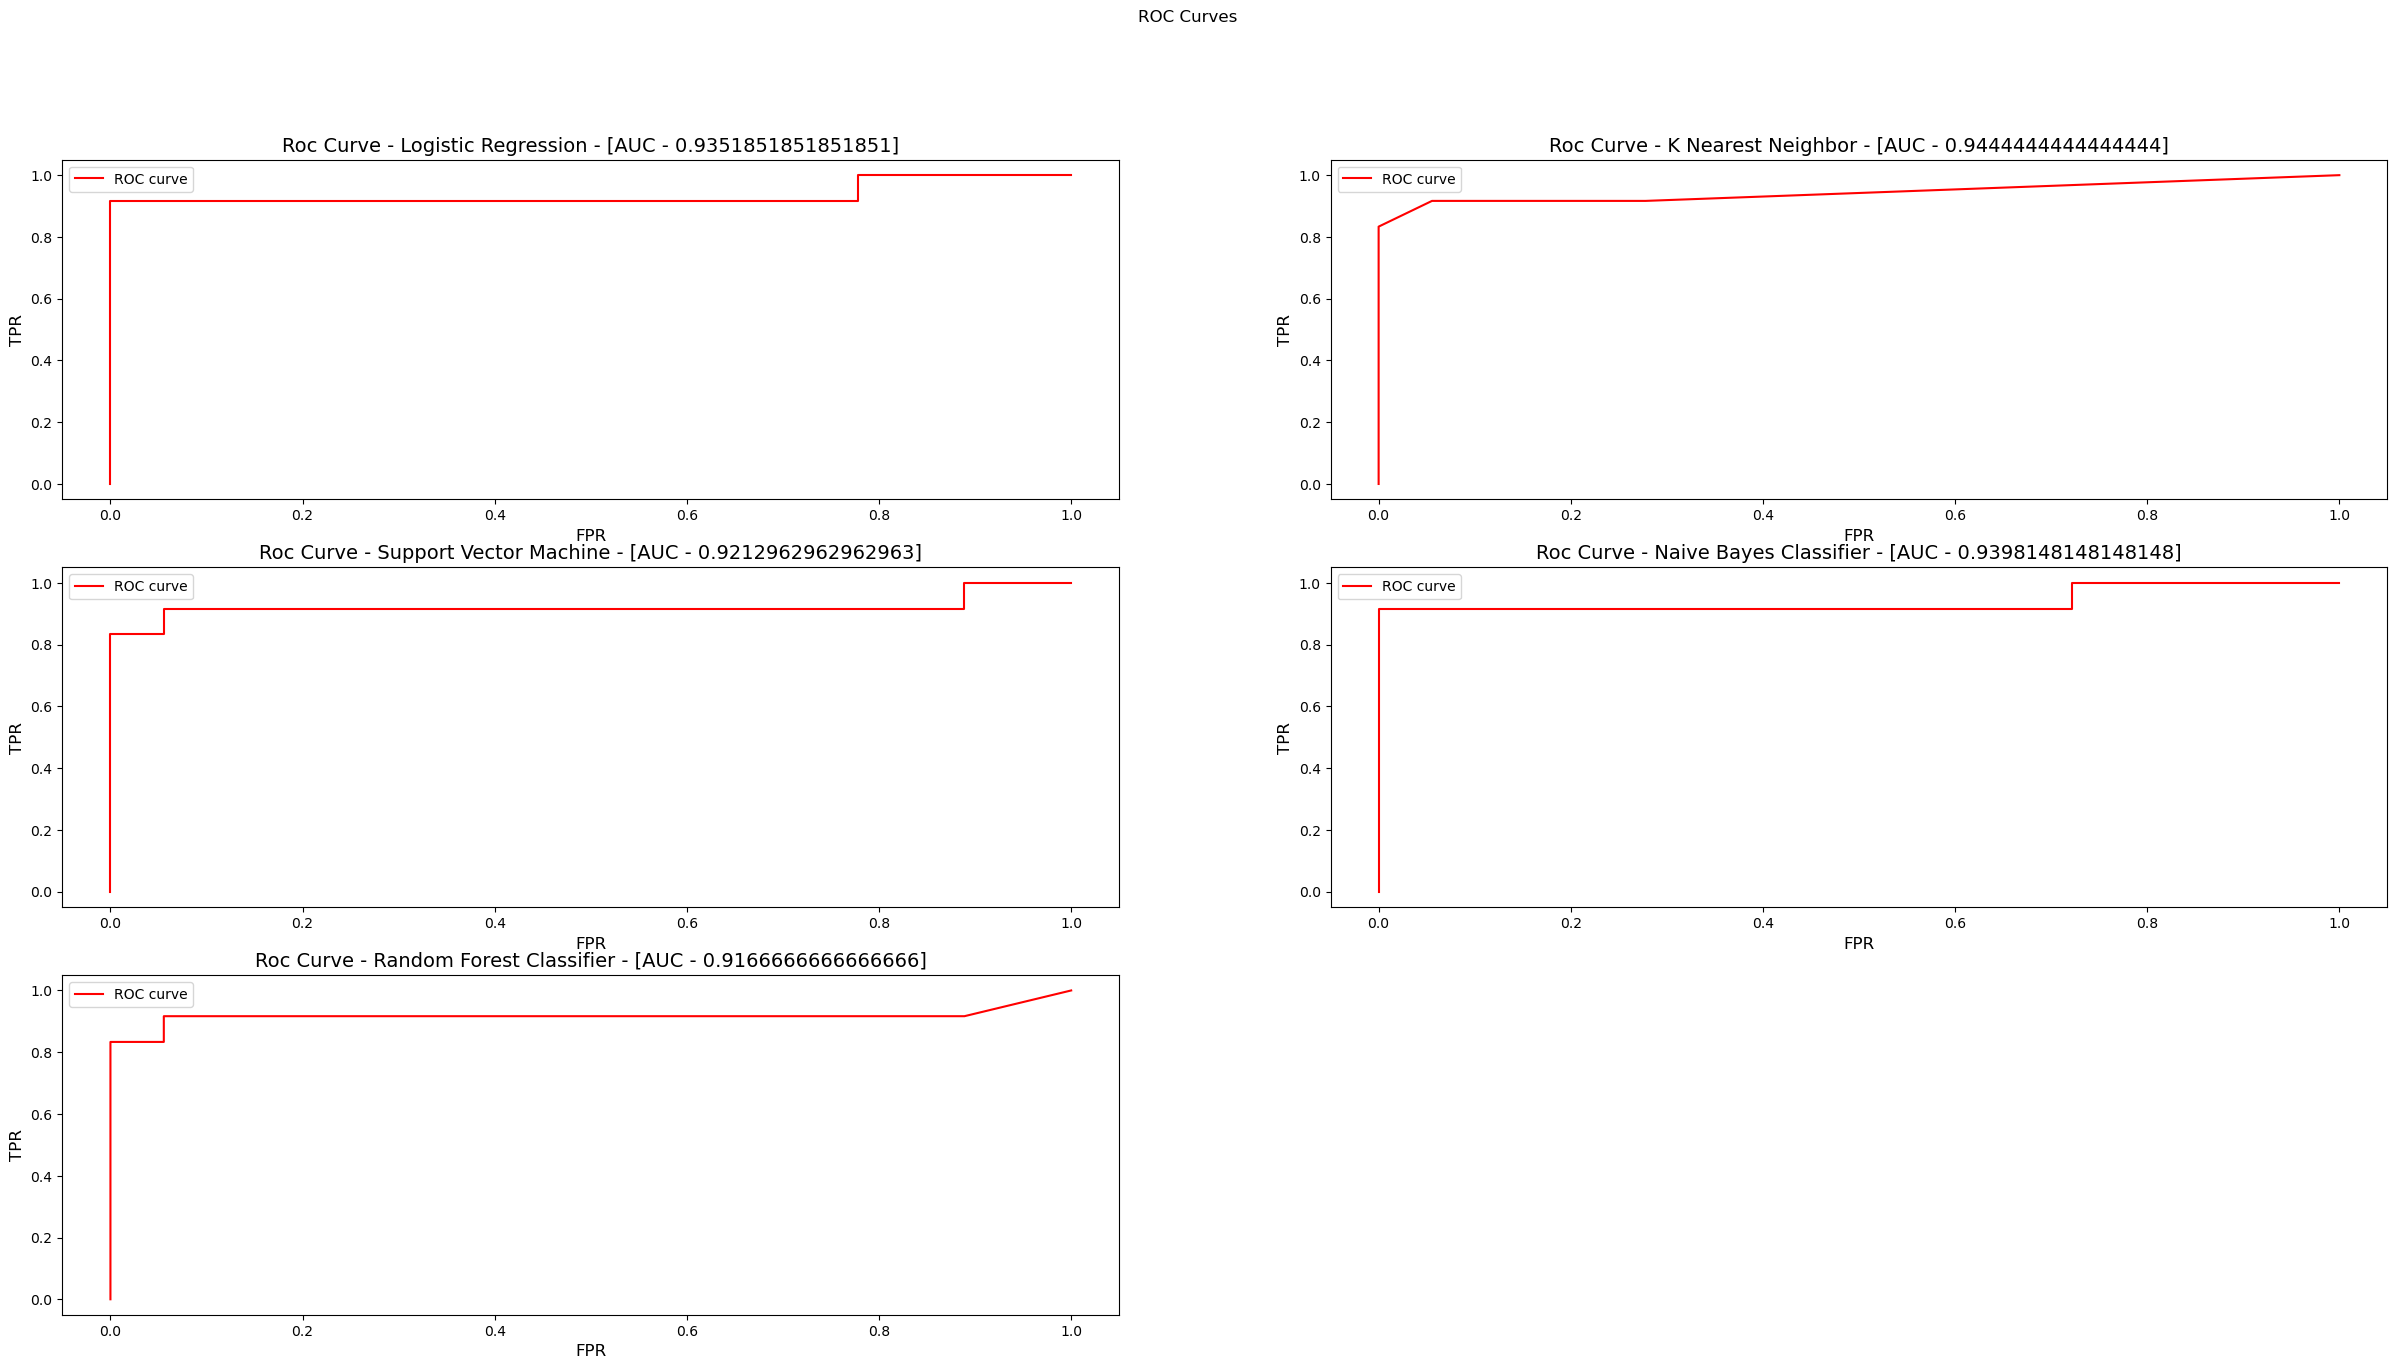

In [29]:
# model evaluation with confusion matrix and ROC curve

print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_knn_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'K Nearest Neighbor', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_knn_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_knn_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()

In [30]:
# use SMOTE for imbalanced classification

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
over_sampled_X_train, over_sampled_y_train = oversample.fit_resample(X_train, y_train)

In [31]:
lc = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [32]:
lc.fit(over_sampled_X_train, over_sampled_y_train)
knn.fit(over_sampled_X_train, over_sampled_y_train)
svc.fit(over_sampled_X_train, over_sampled_y_train)
nbc.fit(over_sampled_X_train, over_sampled_y_train)
rfc.fit(over_sampled_X_train, over_sampled_y_train)

RandomForestClassifier()

In [33]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_knn_predicted = neigh.predict(X_test)
y_knn_pred_proba = neigh.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_knn_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              preci

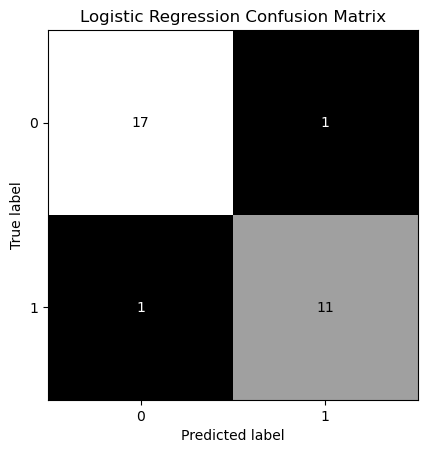

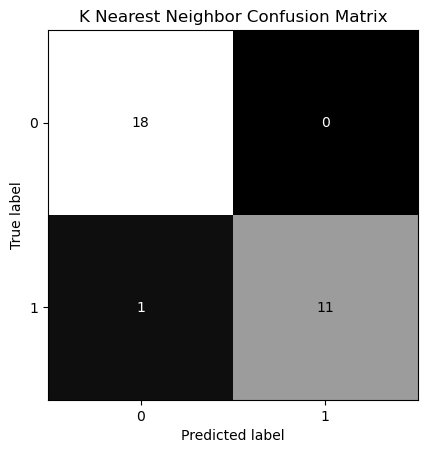

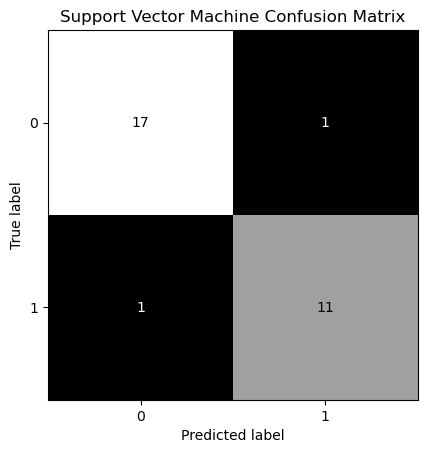

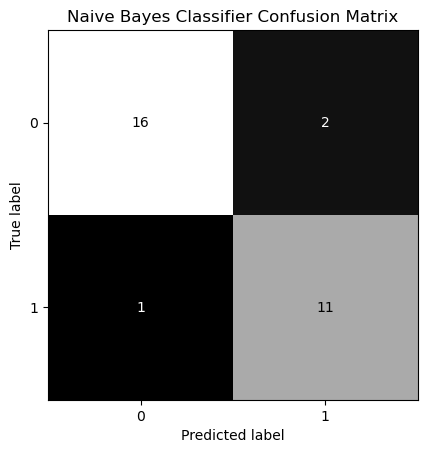

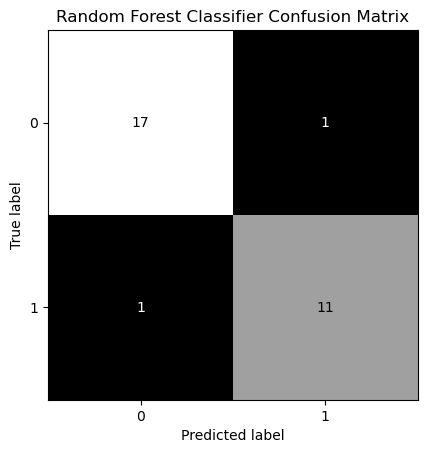

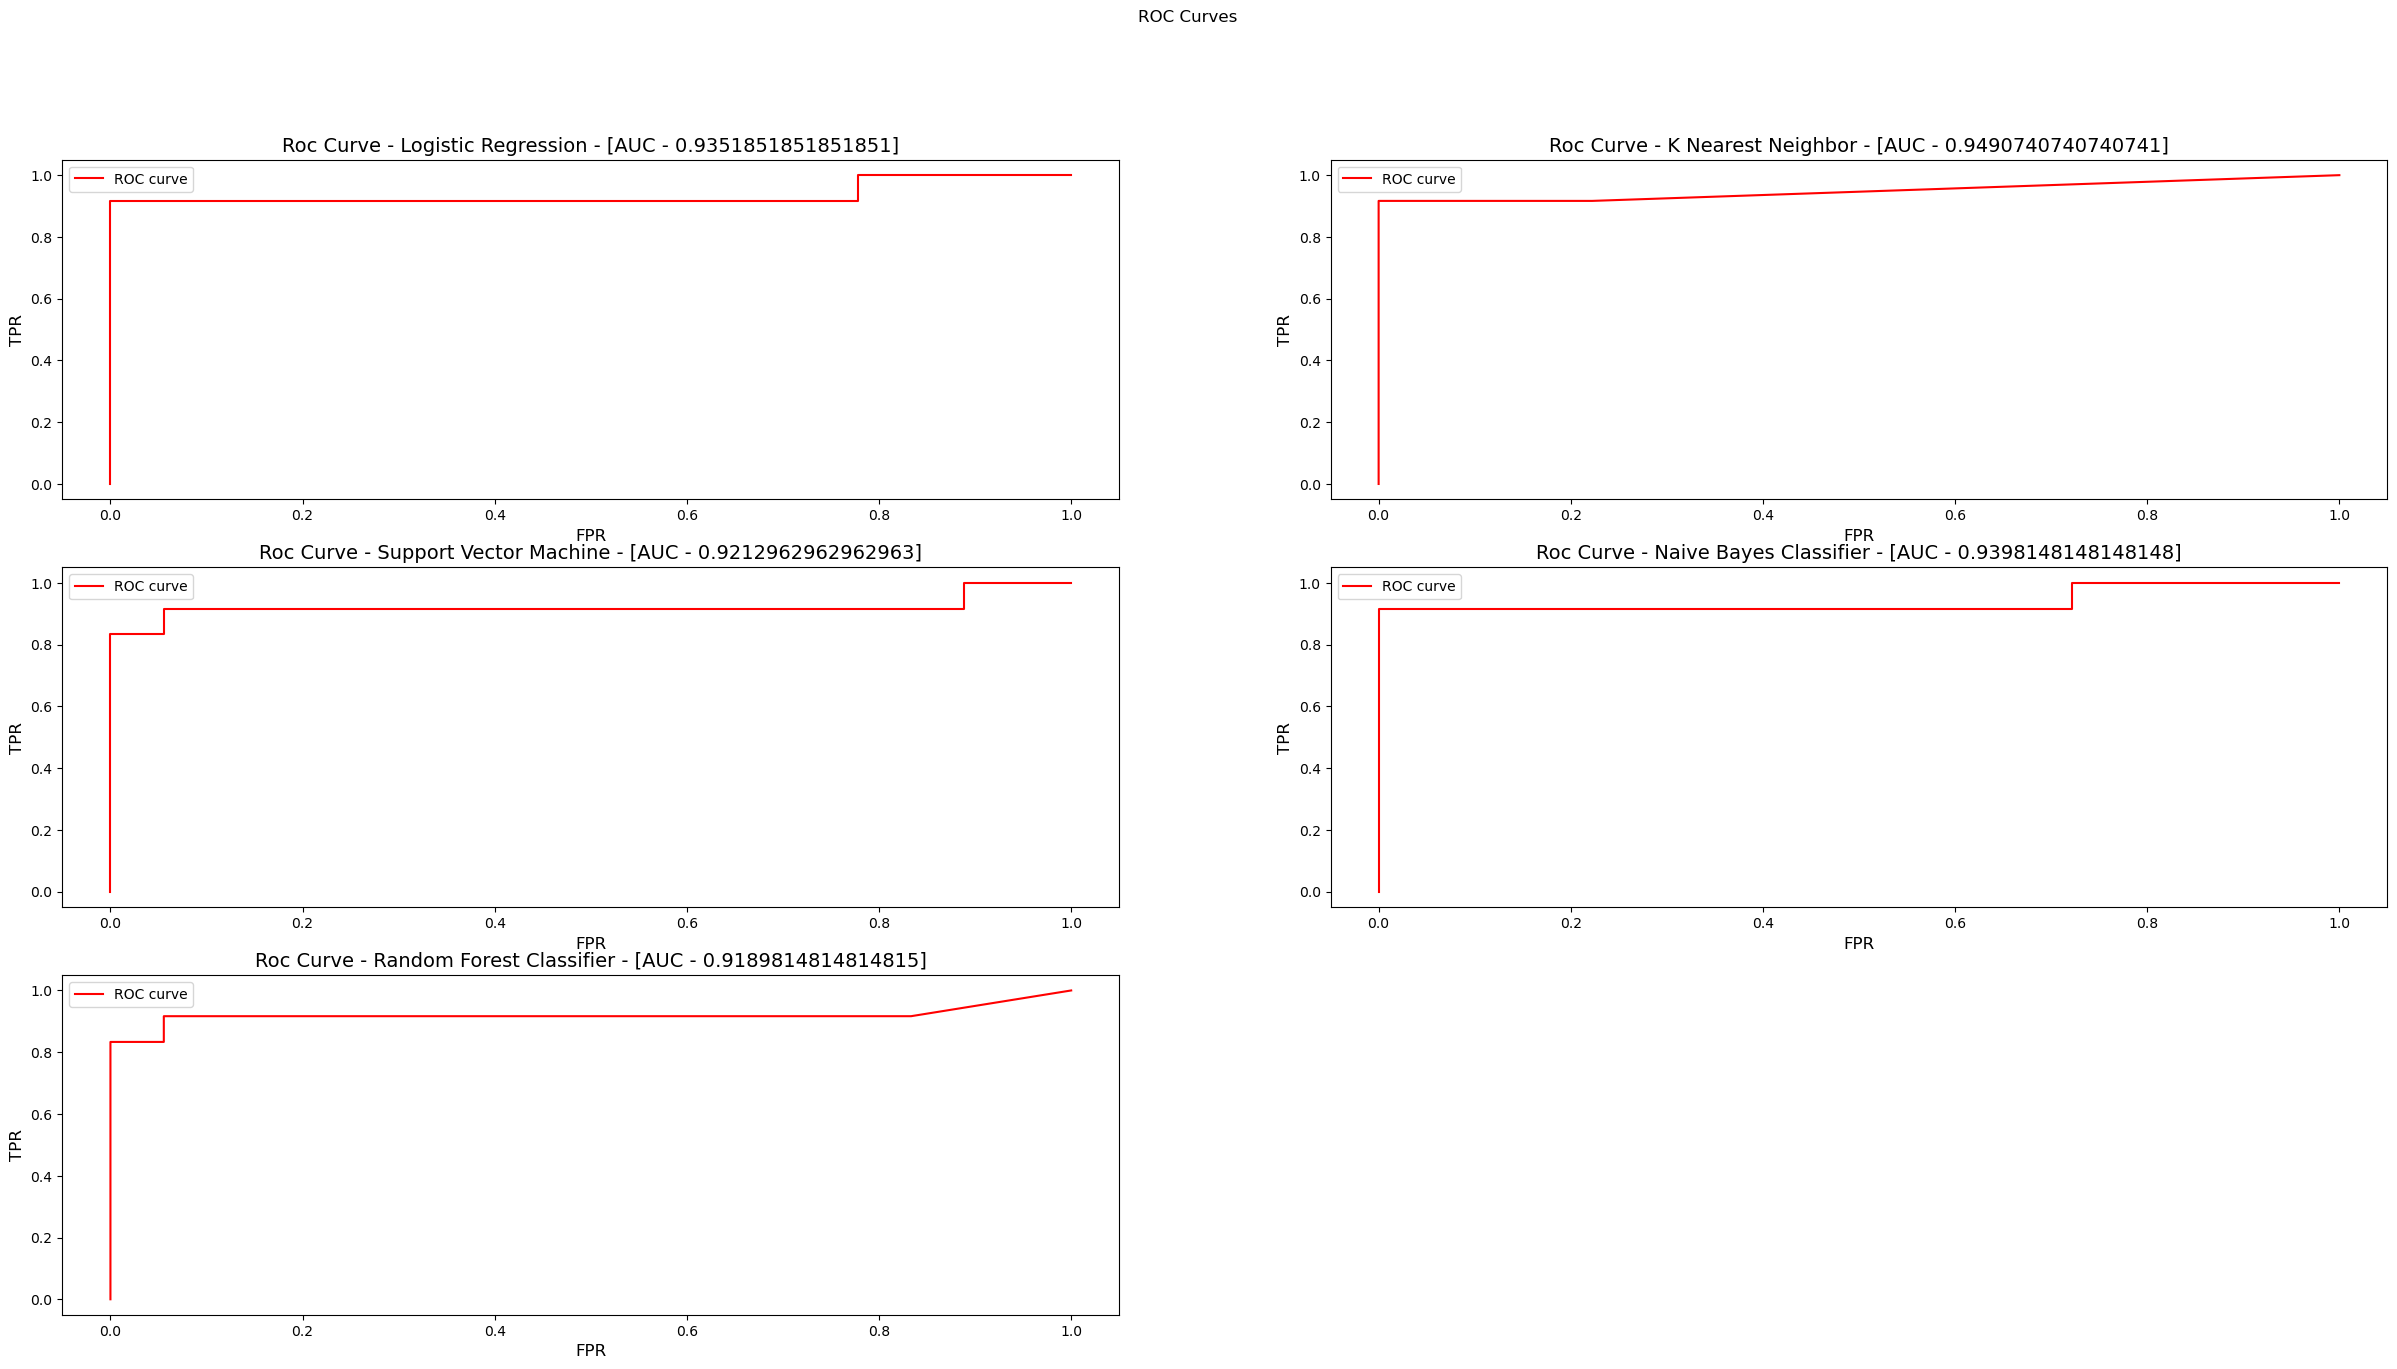

In [34]:
models = ['Logistic Regression', 'K Nearest Neighbor', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_knn_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_knn_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()